### ABOUT THE DATA 
This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
df = pd.read_csv('Employee.csv')


In [80]:
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [81]:
df.describe()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [84]:
df.isna().sum()


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [85]:
df.duplicated().sum()


1889

In [86]:
df.drop_duplicates(inplace=True)


#### Average Age for each Education qualification

In [87]:
df.groupby('Education')['Age'].mean()


Education
Bachelors    31.306443
Masters      30.149137
PHD          29.769231
Name: Age, dtype: float64

#### Sort the data frame by Joining Year

In [88]:
df.sort_values(by='JoiningYear', ascending=True, inplace=True)


#### Visualizations

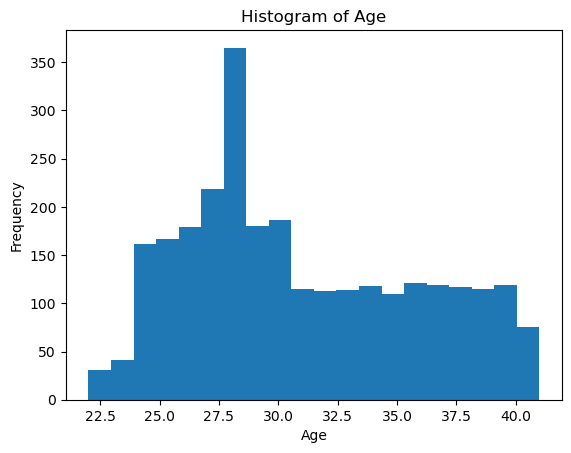

In [89]:
plt.hist(df['Age'], bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


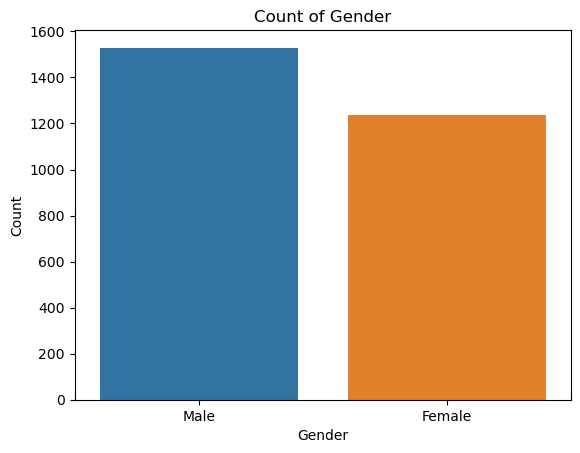

In [90]:
sns.countplot(data = df, x = 'Gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


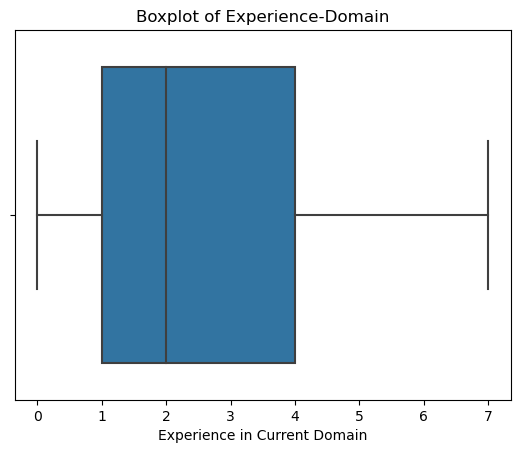

In [91]:
sns.boxplot(data = df, x = 'ExperienceInCurrentDomain')
plt.title('Boxplot of Experience-Domain')
plt.xlabel('Experience in Current Domain')
plt.show()


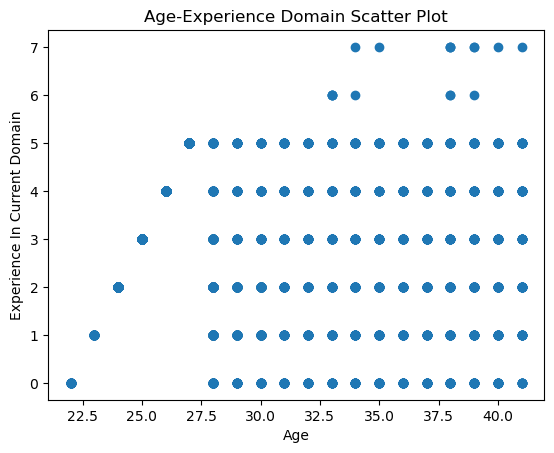

In [92]:
plt.scatter(df['Age'], df['ExperienceInCurrentDomain'])
plt.title('Age-Experience Domain Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Experience In Current Domain')
plt.show()


#### GroupBy

In [93]:
df.groupby(['PaymentTier', 'LeaveOrNot'])['LeaveOrNot'].count()


PaymentTier  LeaveOrNot
1            0              141
             1               77
2            0              227
             1              343
3            0             1308
             1              668
Name: LeaveOrNot, dtype: int64

In [94]:
 df.loc[df['LeaveOrNot']==1, 'Age'].mean()
    

30.22426470588235

In [95]:
df.groupby('LeaveOrNot')['Age'].mean()


LeaveOrNot
0    31.426014
1    30.224265
Name: Age, dtype: float64

In [96]:
df.groupby('City')['City'].count()


City
Bangalore    1171
New Delhi     792
Pune          801
Name: City, dtype: int64

In [97]:
benched_percentage = df.groupby('EverBenched')['EverBenched'].count() / len(df) * 100
benched_percentage


EverBenched
No     86.939219
Yes    13.060781
Name: EverBenched, dtype: float64

In [98]:
df.groupby(['Education', 'Gender'])['Age'].mean()


Education  Gender
Bachelors  Female    30.929530
           Male      31.619313
Masters    Female    30.348921
           Male      29.994429
PHD        Female    29.730159
           Male      29.795699
Name: Age, dtype: float64

In [99]:
df.groupby('PaymentTier')['ExperienceInCurrentDomain'].std()


PaymentTier
1    1.657295
2    1.543400
3    1.624992
Name: ExperienceInCurrentDomain, dtype: float64

In [100]:
df.groupby(['JoiningYear', 'Gender'])['Gender'].count()


JoiningYear  Gender
2012         Female    127
             Male      181
2013         Female    175
             Male      221
2014         Female    163
             Male      222
2015         Female    265
             Male      199
2016         Female    123
             Male      187
2017         Female    284
             Male      378
2018         Female     98
             Male      141
Name: Gender, dtype: int64

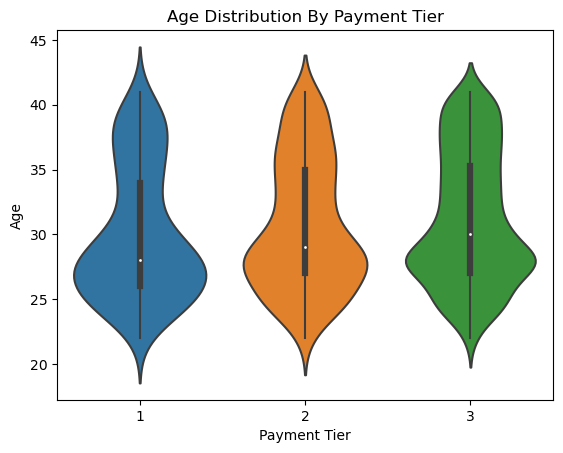

In [101]:
sns.violinplot(data = df, x = 'PaymentTier', y = 'Age')
plt.xlabel('Payment Tier')
plt.ylabel('Age')
plt.title('Age Distribution By Payment Tier')
plt.show()


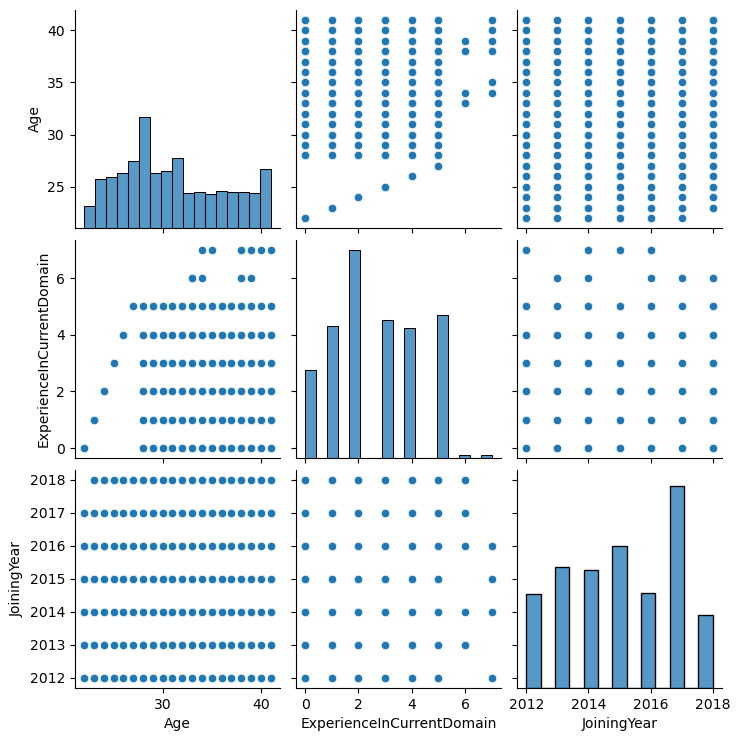

In [102]:
sns.pairplot(df[['Age', 'ExperienceInCurrentDomain', 'JoiningYear']])
plt.show()


In [103]:
city_leave_counts_df = df.groupby('City')['LeaveOrNot'].value_counts().unstack()
city_leave_counts_df


LeaveOrNot,0,1
City,,
Bangalore,761,410
New Delhi,522,270
Pune,393,408


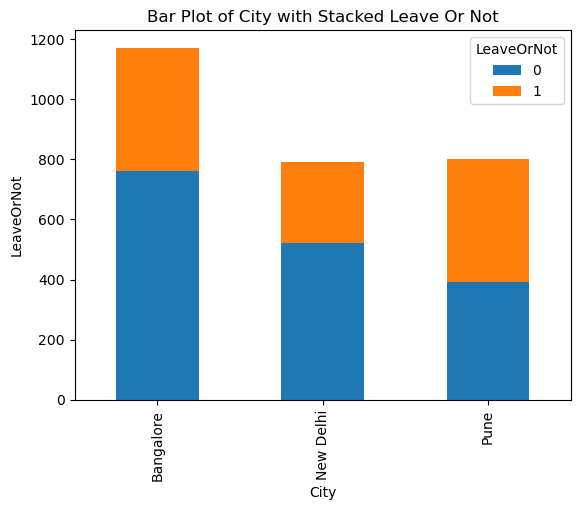

In [104]:
city_leave_counts_df.plot(kind = 'bar', stacked = True)
plt.xlabel('City')
plt.ylabel('LeaveOrNot')
plt.title('Bar Plot of City with Stacked Leave Or Not')
plt.legend(title = 'LeaveOrNot')
plt.show()


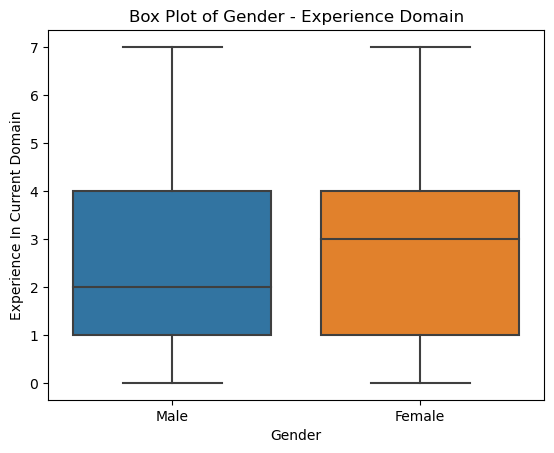

In [105]:
sns.boxplot(data = df, x = 'Gender', y = 'ExperienceInCurrentDomain')
plt.xlabel('Gender')
plt.ylabel('Experience In Current Domain')
plt.title('Box Plot of Gender - Experience Domain')
plt.show()


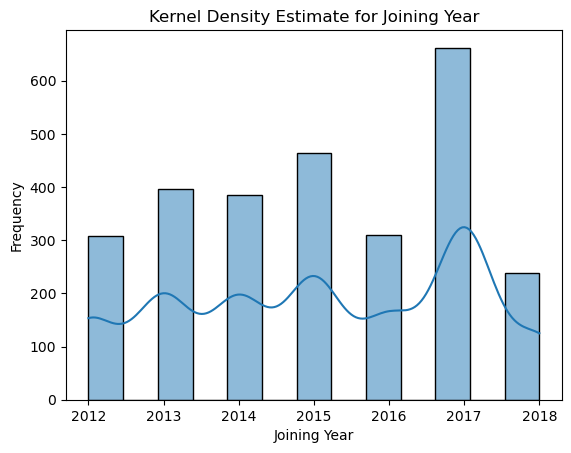

In [107]:
sns.histplot(df['JoiningYear'], kde = True)
plt.xlabel('Joining Year')
plt.ylabel('Frequency')
plt.title('Kernel Density Estimate for Joining Year')
plt.show()


In [110]:
grouped_df = df.groupby(['Education', 'Gender'])['ExperienceInCurrentDomain'].mean().unstack()
grouped_df


Gender,Female,Male
Education,,
Bachelors,2.647651,2.564531
Masters,2.741007,2.715877
PHD,2.841270,2.838710


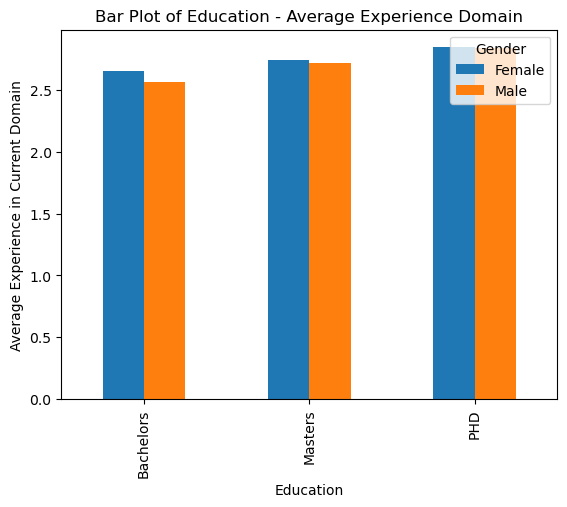

In [115]:
grouped_df.plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Average Experience in Current Domain')
plt.title('Bar Plot of Education - Average Experience Domain')
plt.show()


In [117]:
grouped_df = df.groupby(['JoiningYear', 'EverBenched'])['EverBenched'].count().unstack()
grouped_df


EverBenched,No,Yes
JoiningYear,,
2012,277,31
2013,336,60
2014,349,36
2015,397,67
2016,272,38
2017,594,68
2018,178,61


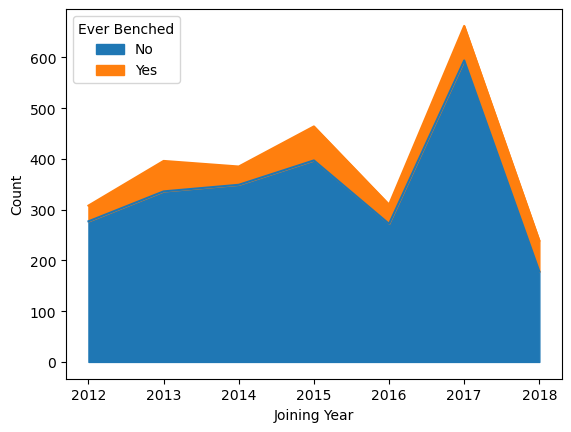

In [119]:
grouped_df.plot(kind = 'area', stacked = True)
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.legend(title = 'Ever Benched')
plt.show()


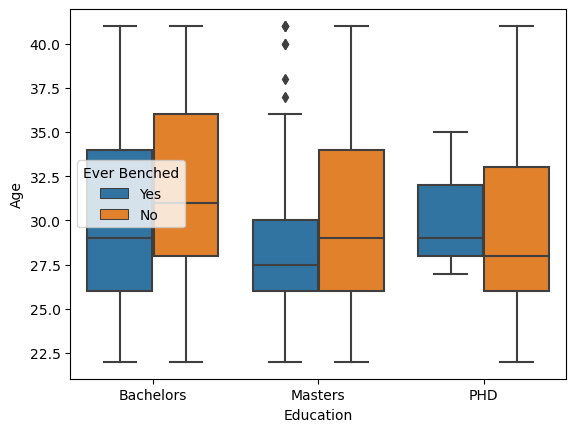

In [121]:
sns.boxplot(data = df, x = 'Education', y = 'Age', hue = 'EverBenched')
plt.xlabel('Education')
plt.ylabel('Age')
plt.legend(title = 'Ever Benched')
plt.show()


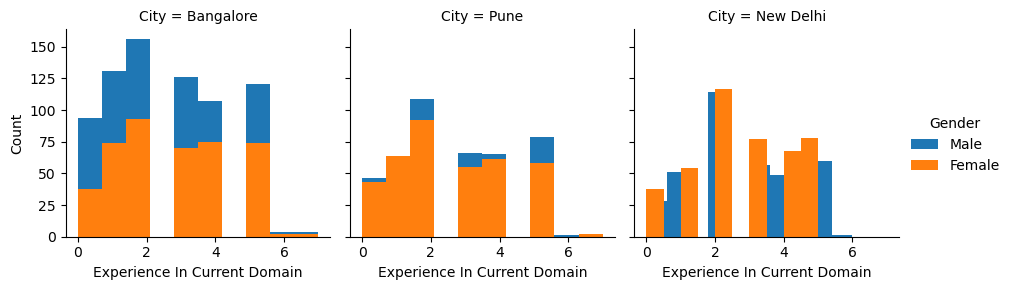

In [122]:
g = sns.FacetGrid(df, col = 'City', hue = 'Gender')
g.map(plt.hist, 'ExperienceInCurrentDomain')
g.set_axis_labels('Experience In Current Domain', 'Count')
g.add_legend(title = 'Gender')
plt.show()


In [124]:
grouped_df = df.groupby(['JoiningYear', 'City'])['Age'].mean().unstack()
grouped_df


City,Bangalore,New Delhi,Pune
JoiningYear,,,
2012,31.993631,29.657895,30.333333
2013,30.965714,29.627273,30.369369
2014,31.562162,29.662921,31.171171
2015,31.488372,29.750000,31.020833
2016,31.931250,29.916667,30.743590
2017,31.583732,31.032374,30.680000
2018,31.389381,30.388060,30.949153


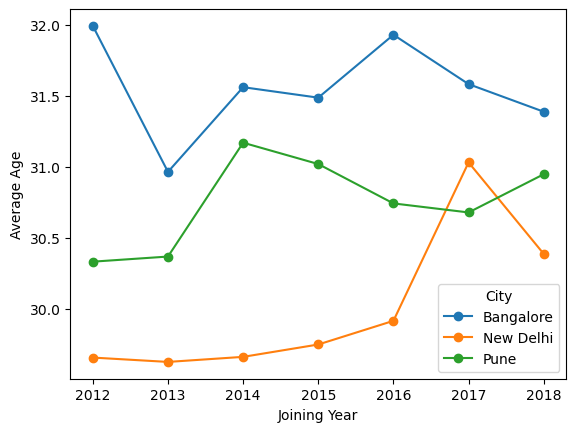

In [126]:
grouped_df.plot(kind = 'line', marker = 'o')
plt.xlabel('Joining Year')
plt.ylabel('Average Age')
plt.show()


#### Feature Engineering

In [128]:
df.columns


Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [157]:
X = df.loc[:, df.columns != 'LeaveOrNot']
X


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2
3052,Bachelors,2012,Bangalore,3,34,Male,No,1
3054,Bachelors,2012,Bangalore,3,39,Female,No,2
3055,Bachelors,2012,Bangalore,3,41,Male,No,3
3058,Bachelors,2012,Bangalore,3,33,Male,No,2
...,...,...,...,...,...,...,...,...
2221,Bachelors,2018,Pune,3,29,Male,Yes,1
2529,Masters,2018,New Delhi,3,30,Female,No,4
70,Bachelors,2018,Bangalore,3,23,Female,No,1
3267,Bachelors,2018,New Delhi,3,35,Female,No,2


In [158]:
y = df.loc[:, 'LeaveOrNot']
y


4651    0
3052    0
3054    0
3055    0
3058    0
       ..
2221    1
2529    1
70      1
3267    1
3293    1
Name: LeaveOrNot, Length: 2764, dtype: int64

In [159]:
X = X.drop(columns = ['JoiningYear', 'City', 'Age'])
X


,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4651,Bachelors,3,Male,Yes,2
3052,Bachelors,3,Male,No,1
3054,Bachelors,3,Female,No,2
3055,Bachelors,3,Male,No,3
3058,Bachelors,3,Male,No,2
...,...,...,...,...,...
2221,Bachelors,3,Male,Yes,1
2529,Masters,3,Female,No,4
70,Bachelors,3,Female,No,1
3267,Bachelors,3,Female,No,2


In [160]:
# we have categorical columns and we want them numeric
# use label encoder

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()


In [162]:
X['Education'] = labelencoder.fit_transform(X['Education'])
X


,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4651,0,3,Male,Yes,2
3052,0,3,Male,No,1
3054,0,3,Female,No,2
3055,0,3,Male,No,3
3058,0,3,Male,No,2
...,...,...,...,...,...
2221,0,3,Male,Yes,1
2529,1,3,Female,No,4
70,0,3,Female,No,1
3267,0,3,Female,No,2


In [163]:
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X['EverBenched'] = labelencoder.fit_transform(X['EverBenched'])
X


,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4651,0,3,1,1,2
3052,0,3,1,0,1
3054,0,3,0,0,2
3055,0,3,1,0,3
3058,0,3,1,0,2
...,...,...,...,...,...
2221,0,3,1,1,1
2529,1,3,0,0,4
70,0,3,0,0,1
3267,0,3,0,0,2


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


Function to check accuracy

In [167]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print('Accuracy score in model is {}'.format(accuracy_score(y_test, predictions)))


#### Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)


LogisticRegression()

In [169]:
log_predictions = log_model.predict(scaled_X_test)
modelperformance(log_predictions)


Accuracy score in model is 0.6654611211573237


#### SVM

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C' : [0.01, 0.1, 0.5, 1], 'kernel' : ['linear', 'rbf', 'poly']}


In [175]:
gridsvc = GridSearchCV(svm, param_grid, cv = 3)
gridsvc.fit(scaled_X_train, y_train)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [176]:
gridsvc.best_params_


{'C': 0.5, 'kernel': 'rbf'}

In [177]:
pred_svc = gridsvc.predict(scaled_X_test)
modelperformance(pred_svc)


Accuracy score in model is 0.6672694394213382


#### Decision Tree Classifier

In [188]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30, 40, 50], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 2, 4]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3)
grid_search_tree.fit(scaled_X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [189]:
grid_search_tree.best_params_


{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [190]:
preds = grid_search_tree.predict(scaled_X_test)
modelperformance(preds)


Accuracy score in model is 0.6618444846292948


#### Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
n_estimators = [32, 64, 128, 256]
max_features = [None, 2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]
param_grid = {'n_estimators': n_estimators, 'max_features': max_features,'bootstrap': bootstrap, 
              'oob_score': oob_score}

grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 3)
grid_rfc.fit(scaled_X_train, y_train)


/Users/adityachauhan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/adityachauhan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adityachauhan/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.wa

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [192]:
grid_rfc.best_params_


{'bootstrap': False,
 'max_features': 2,
 'n_estimators': 256,
 'oob_score': False}

In [193]:
preds = grid_rfc.predict(scaled_X_test)
modelperformance(preds)


Accuracy score in model is 0.6708860759493671
